Importing important libraries here

In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
files=[file for file in os.listdir('Sales_Data/')]
all_month_data=pd.DataFrame()
for file in files:
    df=pd.read_csv('Sales_Data/'+file)
    all_month_data= pd.concat([all_month_data,df])

In [3]:
all_month_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## clean up the data

In [4]:
nan_df=all_month_data[all_month_data.isna().any(axis = 1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
all_month_data=all_month_data.dropna(how='all')

In [6]:
all_month_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##  Now let's find which month has maximum sales

In [7]:
all_month_data['month']=all_month_data['Order Date'].str[0:2]
#all_month_data['month']=all_month_data['month'].astype(int)

This cant be done because some of order dates are not noted and just writted as order dates and above commmand gives error
so we need to find the rows in which order date is missing and remove them

In [8]:
temp_df=all_month_data[all_month_data['month'].str[0:2]=='Or']

In [9]:
all_month_data=all_month_data[all_month_data['month'].str[0:2] !='Or']

In [10]:
all_month_data['month']=all_month_data['month'].astype('int32')
all_month_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [11]:
#all_month_data['sales']=all_month_data['Quantity Ordered']*all_month_data['Price Each']

more cleaning

In [16]:
# you can use astype too but use the following method
all_month_data['Quantity Ordered']=pd.to_numeric(all_month_data['Quantity Ordered'])
all_month_data['Price Each']=pd.to_numeric(all_month_data['Price Each'])

In [17]:
all_month_data["Sales"]=all_month_data['Quantity Ordered']*all_month_data['Price Each']

In [18]:
all_month_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [19]:
df_plot=all_month_data.groupby('month').sum()
df_plot.head(12)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
month,,,,,,,
1,2971502978172978172979692983442990492991253003...,Lightning Charging CableiPhoneLightning Chargi...,10903,1811768.38,01/01/20 00:3801/01/20 00:2201/01/20 00:2201/0...,"427 Wilson St, Dallas, TX 75001519 13th St, Ne...",1822256.73
2,1505021505031505041505051505061505071505081505...,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,13449,2188884.72,02/18/19 01:3502/13/19 07:2402/18/19 09:4602/0...,"866 Spruce St, Portland, ME 0410118 13th St, S...",2202022.42
3,1505331505411508121517491520361532841535441538...,AAA Batteries (4-pack)AAA Batteries (4-pack)Wi...,17005,2791207.83,03/01/19 03:0603/01/19 01:0303/01/19 02:1803/0...,"270 Dogwood St, San Francisco, CA 94016683 Ada...",2807100.38
4,1765581765591765601765601765611765621765631765...,USB-C Charging CableBose SoundSport Headphones...,20558,3367671.02,04/19/19 08:4604/07/19 22:3004/12/19 14:3804/1...,"917 1st St, Dallas, TX 75001682 Chestnut St, B...",3390670.24
5,1769781775511777781777781790761790761791341800...,Apple Airpods Headphones27in FHD MonitoriPhone...,18667,3135125.13,05/01/19 03:2905/01/19 00:1305/01/19 00:4805/0...,"589 Lake St, Portland, OR 97035615 Lincoln St,...",3152606.75
6,2099212099222099232099242099252099262099272099...,USB-C Charging CableMacbook Pro LaptopThinkPad...,15253,2562025.61,06/23/19 19:3406/30/19 10:0506/24/19 20:1806/0...,"950 Walnut St, Portland, ME 0410180 4th St, Sa...",2577802.26
7,2229102229112229122229132229142229152229162229...,Apple Airpods HeadphonesFlatscreen TVAA Batter...,16072,2632539.56,07/26/19 16:5107/05/19 08:5507/29/19 12:4107/2...,"389 South St, Atlanta, GA 30301590 4th St, Sea...",2647775.76
8,2366702366712366722366732366742366752366762366...,Wired HeadphonesBose SoundSport HeadphonesiPho...,13448,2230345.42,08/31/19 22:2108/15/19 15:1108/06/19 14:4008/2...,"359 Spruce St, Seattle, WA 98101492 Ridge St, ...",2244467.88
9,2388342392852406362410542423432428652436672449...,Apple Airpods Headphones34in Ultrawide Monitor...,13109,2084992.09,09/01/19 04:1309/01/19 01:0909/01/19 02:0709/0...,"761 Forest St, San Francisco, CA 94016373 1st ...",2097560.13


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Sales throughout the year')

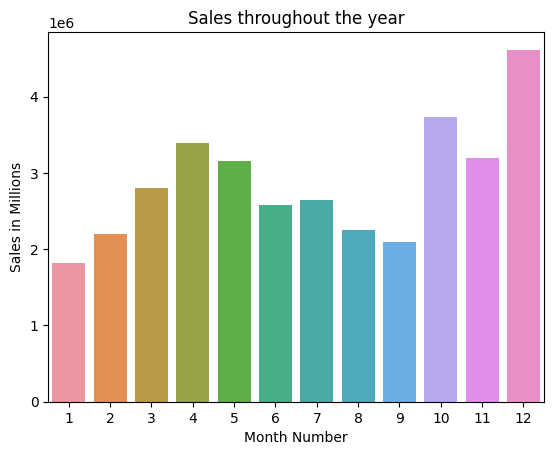

In [21]:
sns.barplot(x=[1,2,3,4,5,6,7,8,9,10,11,12],y='Sales',data=df_plot)
plt.xlabel('Month Number')
plt.ylabel('Sales in Millions')
plt.title('Sales throughout the year')

#### Question 2: What city have the highest number of sell?


In [19]:
all_month_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [22]:
#lets use .apply()
all_month_data['Cities']=all_month_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_month_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,Cities
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


there are two cities with same names so lets grab state names too

In [23]:
all_month_data['States']=all_month_data['Purchase Address'].apply(lambda x: x.split(',')[2])

In [24]:
all_month_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,Cities,States
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001


to remove the zip code we do another split

In [25]:
all_month_data['States']=all_month_data['Purchase Address'].apply(lambda x: x.split(',')[2])
all_month_data['States']=all_month_data['States'].apply(lambda x: x.split(' ')[1])

In [26]:
all_month_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,Cities,States
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA


In [27]:
all_month_data['City']=all_month_data['Cities']+' ('+all_month_data['States']+')'

In [28]:
all_month_data=all_month_data.drop(['Cities','States'],axis=1)

In [29]:
all_month_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [45]:

temp_df=all_month_data.groupby('City').sum()
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
City,,,,,,,,
Atlanta (GA),1765641765711765821765891766231766271766341766...,USB-C Charging CableLightning Charging CableBo...,16602,2779908.20,04/12/19 10:5804/19/19 14:2904/27/19 12:2004/0...,"790 Ridge St, Atlanta, GA 30301253 Johnson St,...",104794,2795498.58
Austin (TX),1765911766091766741766771766861767011767051767...,Apple Airpods HeadphonesApple Airpods Headphon...,11153,1809873.61,04/21/19 07:2104/11/19 16:5904/20/19 20:5304/0...,"600 Maple St, Austin, TX 73301267 11th St, Aus...",69829,1819581.75
Boston (MA),1765591765661765781765811765851765851766001766...,Bose SoundSport HeadphonesWired HeadphonesAppl...,22528,3637409.77,04/07/19 22:3004/08/19 14:0504/09/19 23:3504/0...,"682 Chestnut St, Boston, MA 0221583 7th St, Bo...",141112,3661642.01
Dallas (TX),1765581765691765701765771765961766021766101766...,USB-C Charging Cable27in 4K Gaming MonitorAA B...,16730,2752627.82,04/19/19 08:4604/16/19 19:2304/22/19 15:0904/0...,"917 1st St, Dallas, TX 75001657 Hill St, Dalla...",104620,2767975.40
Los Angeles (CA),1765601765601765611765671765741765741765761765...,Google PhoneWired HeadphonesWired HeadphonesGo...,33289,5421435.23,04/12/19 14:3804/12/19 14:3804/30/19 09:2704/1...,"669 Spruce St, Los Angeles, CA 90001669 Spruce...",208325,5452570.80


Text(0.5, 1.0, 'Sales of resp Citiies')

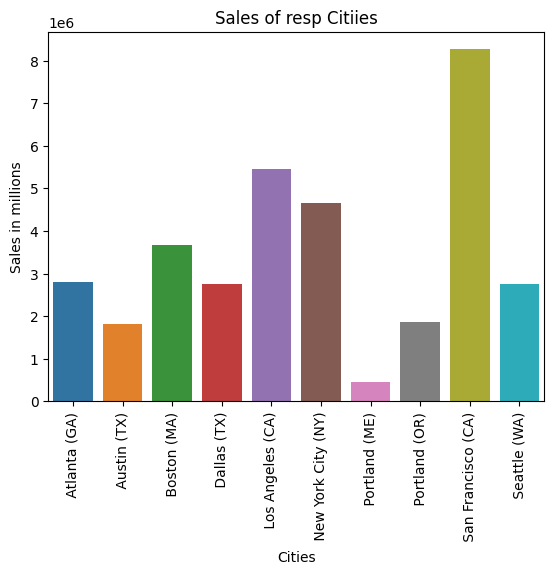

In [62]:
cities=temp_df.index.unique()
sns.barplot(data=temp_df,x=cities,y='Sales',)
plt.xlabel('Cities',size=10)
plt.xticks(rotation='vertical')
plt.ylabel('Sales in millions')
plt.title('Sales of resp Citiies')

## Question 3: what time should we advertise the product?

In [63]:
all_month_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


WE NEED DATE TIME OBJECT

In [65]:
all_month_data['Order Date']=pd.to_datetime(all_month_data['Order Date'])

C:\Users\itsra\AppData\Local\Temp\ipykernel_1888\2000262871.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_month_data['Order Date']=pd.to_datetime(all_month_data['Order Date'])


In [66]:
all_month_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [70]:
all_month_data['Hour']=all_month_data['Order Date'].dt.hour
all_month_data['Minute']=all_month_data['Order Date'].dt.minute

In [71]:
all_month_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [88]:
hour_sort=all_month_data['Hour'].unique()
hour_sort

array([ 8, 22, 14,  9, 13,  7, 10, 17, 12, 19, 15, 20, 18,  0, 11, 23, 21,
        4, 16,  5,  2,  1,  6,  3])

In [101]:
Hours=np.sort(hour_sort)
Hours

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [112]:
temp_df=all_month_data.groupby('Hour')['Quantity Ordered'].sum()
temp_df


Hour
0      4428
1      2619
2      1398
3       928
4       937
5      1493
6      2810
7      4556
8      7002
9      9816
10    12308
11    14005
12    14202
13    13685
14    12362
15    11391
16    11662
17    12229
18    13802
19    14470
20    13768
21    12244
22     9899
23     7065
Name: Quantity Ordered, dtype: int64

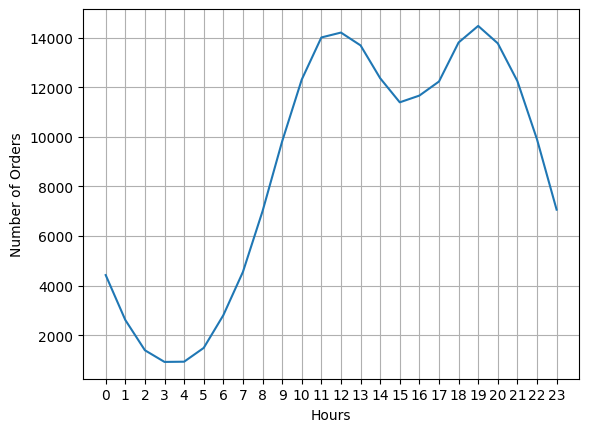

In [114]:
sns.lineplot(x=Hours,y=temp_df)
plt.xticks(Hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()


## Question 4: What are products which are sold together?

In [115]:
all_month_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


same order ID mean they are ordered together

In [137]:
df=all_month_data[all_month_data.duplicated(keep=False)]

In [138]:
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31
1301,177795,Apple Airpods Headphones,1,150.00,2019-04-27 19:45:00,"740 14th St, Seattle, WA 98101",4,150.00,Seattle (WA),19,45
1302,177795,Apple Airpods Headphones,1,150.00,2019-04-27 19:45:00,"740 14th St, Seattle, WA 98101",4,150.00,Seattle (WA),19,45
1682,178158,USB-C Charging Cable,1,11.95,2019-04-28 21:13:00,"197 Center St, San Francisco, CA 94016",4,11.95,San Francisco (CA),21,13
1684,178158,USB-C Charging Cable,1,11.95,2019-04-28 21:13:00,"197 Center St, San Francisco, CA 94016",4,11.95,San Francisco (CA),21,13
3804,180207,Apple Airpods Headphones,1,150.00,2019-04-13 01:46:00,"196 7th St, Los Angeles, CA 90001",4,150.00,Los Angeles (CA),1,46
3805,180207,Apple Airpods Headphones,1,150.00,2019-04-13 01:46:00,"196 7th St, Los Angeles, CA 90001",4,150.00,Los Angeles (CA),1,46
4195,180576,Lightning Charging Cable,1,14.95,2019-04-18 17:23:00,"431 Park St, Dallas, TX 75001",4,14.95,Dallas (TX),17,23
4196,180576,Lightning Charging Cable,1,14.95,2019-04-18 17:23:00,"431 Park St, Dallas, TX 75001",4,14.95,Dallas (TX),17,23


this is the one with only duplicate items

In [139]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31
1301,177795,Apple Airpods Headphones,1,150.00,2019-04-27 19:45:00,"740 14th St, Seattle, WA 98101",4,150.00,Seattle (WA),19,45
1302,177795,Apple Airpods Headphones,1,150.00,2019-04-27 19:45:00,"740 14th St, Seattle, WA 98101",4,150.00,Seattle (WA),19,45
1682,178158,USB-C Charging Cable,1,11.95,2019-04-28 21:13:00,"197 Center St, San Francisco, CA 94016",4,11.95,San Francisco (CA),21,13


In [140]:
df['combined']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\itsra\AppData\Local\Temp\ipykernel_1888\1811568144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['combined']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [141]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute,combined
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
1301,177795,Apple Airpods Headphones,1,150.00,2019-04-27 19:45:00,"740 14th St, Seattle, WA 98101",4,150.00,Seattle (WA),19,45,"Apple Airpods Headphones,Apple Airpods Headphones"
1302,177795,Apple Airpods Headphones,1,150.00,2019-04-27 19:45:00,"740 14th St, Seattle, WA 98101",4,150.00,Seattle (WA),19,45,"Apple Airpods Headphones,Apple Airpods Headphones"
1682,178158,USB-C Charging Cable,1,11.95,2019-04-28 21:13:00,"197 Center St, San Francisco, CA 94016",4,11.95,San Francisco (CA),21,13,"USB-C Charging Cable,USB-C Charging Cable"


In [143]:
df=df[['combined','Order ID']].drop_duplicates()
df.head()

,combined,Order ID
30,"Bose SoundSport Headphones,Bose SoundSport Hea...",176585
1301,"Apple Airpods Headphones,Apple Airpods Headphones",177795
1682,"USB-C Charging Cable,USB-C Charging Cable",178158
3804,"Apple Airpods Headphones,Apple Airpods Headphones",180207
4195,"Lightning Charging Cable,Lightning Charging Cable",180576


In [145]:
from itertools import combinations
from collections import Counter

In [150]:
count=Counter()
for row in df['combined']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
count.most_common(10)

[(('Lightning Charging Cable', 'Lightning Charging Cable'), 48),
 (('USB-C Charging Cable', 'USB-C Charging Cable'), 44),
 (('Wired Headphones', 'Wired Headphones'), 33),
 (('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)'), 29),
 (('Bose SoundSport Headphones', 'Bose SoundSport Headphones'), 27),
 (('Apple Airpods Headphones', 'Apple Airpods Headphones'), 24),
 (('AA Batteries (4-pack)', 'AA Batteries (4-pack)'), 19),
 (('27in FHD Monitor', '27in FHD Monitor'), 9),
 (('34in Ultrawide Monitor', '34in Ultrawide Monitor'), 7),
 (('Flatscreen TV', 'Flatscreen TV'), 6)]

### Question 5: What Product sold the most? why do you think it got sold the most?

In [172]:
pro_grp=all_month_data.groupby('Product')['Quantity Ordered']
pro_sold_most=pro_grp.sum()
pro_sold_most

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

In [177]:
pro_sold_most

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

In [178]:
type(pro_sold_most)

pandas.core.series.Series

In [179]:
pro_sold_most.index

Index(['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor',
       '34in Ultrawide Monitor', 'AA Batteries (4-pack)',
       'AAA Batteries (4-pack)', 'Apple Airpods Headphones',
       'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone',
       'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable',
       'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable',
       'Vareebadd Phone', 'Wired Headphones', 'iPhone'],
      dtype='object', name='Product')

In [180]:
products=pro_sold_most.index
orders=pro_sold_most[:]

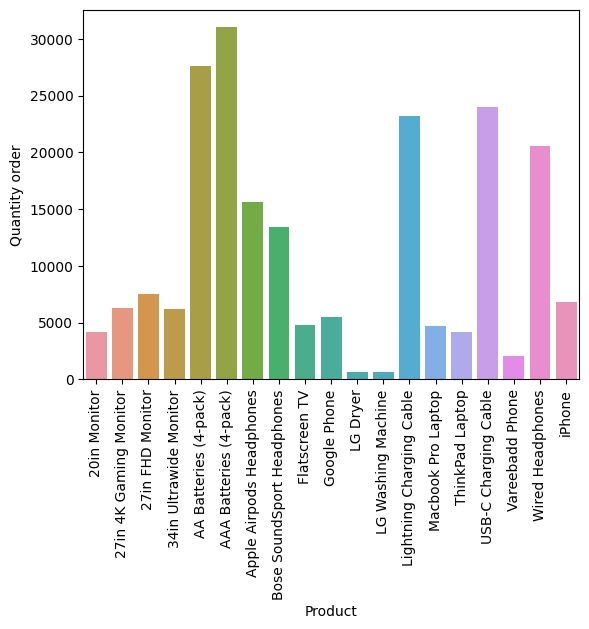

In [188]:
sns.barplot(x=products,y=orders)
plt.xticks(rotation='vertical')
plt.ylabel('Quantity order')
plt.xlabel('Product')
plt.show()

In [191]:
prices=all_month_data.groupby('Product')['Price Each'].mean()
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<Axes: xlabel='Price Each', ylabel='Quantity Ordered'>

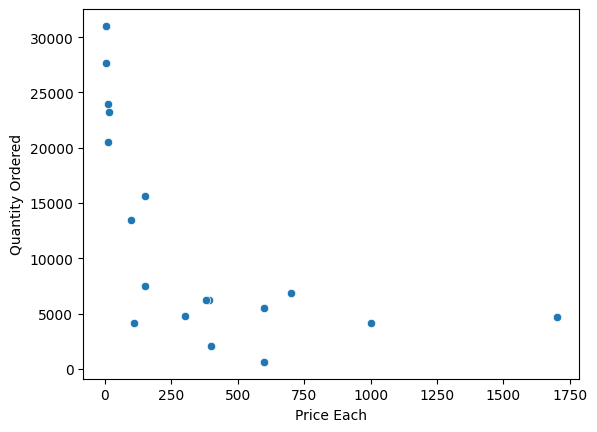

In [200]:
sns.scatterplot(x=prices,y=orders)